In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.shape

(349, 10)

In [5]:
df.duplicated().sum() 
df.drop_duplicates(keep='first') 

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


In [6]:
len(df['Disease'].unique())

116

In [7]:
df['Outcome Variable'].value_counts(normalize=False) 

Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

In [8]:
df[df['Outcome Variable'] == 'Positive']['Disease'].value_counts().head(10)

Asthma          18
Stroke          11
Osteoporosis     7
Influenza        6
Diabetes         5
Hypertension     5
Pneumonia        5
Bronchitis       5
Migraine         5
Liver Cancer     4
Name: Disease, dtype: int64

In [9]:
df[df['Outcome Variable'] == 'Negative']['Disease'].value_counts().head(10)

Osteoporosis         7
Common Cold          5
Allergic Rhinitis    5
Diabetes             5
Asthma               5
Stroke               5
Hypertension         5
Migraine             5
Hyperthyroidism      4
Kidney Cancer        4
Name: Disease, dtype: int64

In [10]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.columns[(df.columns != 'Age') & (df.columns != 'Disease')] # except Disease
labelencoder = LabelEncoder()

df[categorical_columns] = df[categorical_columns].apply(lambda col : labelencoder.fit_transform(col))

df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,0,0,0,1
345,Stroke,1,0,1,0,85,1,0,0,1
346,Stroke,1,0,1,0,85,1,0,0,1
347,Stroke,1,0,1,0,90,0,0,0,1


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = list(categorical_columns) + ['Age']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1.0,0.0,1.0,1.0,0.000000,0.0,0.5,1.0,1.0
1,Common Cold,0.0,1.0,1.0,0.0,0.084507,0.0,1.0,1.0,0.0
2,Eczema,0.0,1.0,1.0,0.0,0.084507,0.0,1.0,1.0,0.0
3,Asthma,1.0,1.0,0.0,1.0,0.084507,1.0,1.0,1.0,1.0
4,Asthma,1.0,1.0,0.0,1.0,0.084507,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1.0,0.0,1.0,0.0,0.859155,0.0,0.0,0.0,1.0
345,Stroke,1.0,0.0,1.0,0.0,0.929577,1.0,0.0,0.0,1.0
346,Stroke,1.0,0.0,1.0,0.0,0.929577,1.0,0.0,0.0,1.0
347,Stroke,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# KNN 

In [14]:
from collections import defaultdict


class KNNClassifier:
    
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors  
    
    def fit(self, X, y):
            
        self.X_train = X
        self.y_train = y

    
    def _distance(self, x_record, x_target):
        

        # Convert namedtuples to pandas Series
        x_record = pd.Series(x_record[1:])
        x_target = pd.Series(x_target[1:])
        
        return np.sqrt(np.sum(( x_target - x_record) ** 2))

    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X.itertuples(index = False)]
        return np.array(y_pred)
    
    def _predict(self, x):
        
        distances = [self._distance(x, x_train) for x_train in self.X_train.itertuples(index = False)]
        
        k_indices = np.argsort(distances)[:self.k] 
        
        disease_potential_score = defaultdict(int)
        
        for i in k_indices:
            disease = self.X_train.iloc[i]['Disease']
            potential_score =   (11*self.y_train.iloc[i] -1) 
            potential_score = 10*potential_score if disease == x[0] else potential_score
            disease_potential_score[disease] += potential_score
            
            
        return int(max(disease_potential_score, key=disease_potential_score.get) == x[0]) 

In [15]:
k = 17
knn_model = KNNClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


In [16]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 59.09%


In [17]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,y_pred)

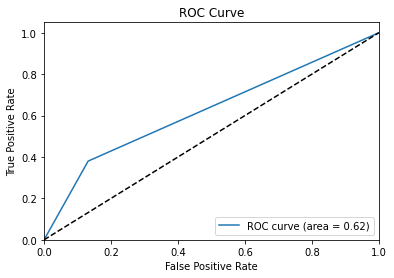

In [18]:
import matplotlib.pyplot as plt
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
### CHOOSING BEST K

error_rate=[]

for i in range(1,40):
    knn = KNNClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0.5, 1.0, 'Error Rate vs K')

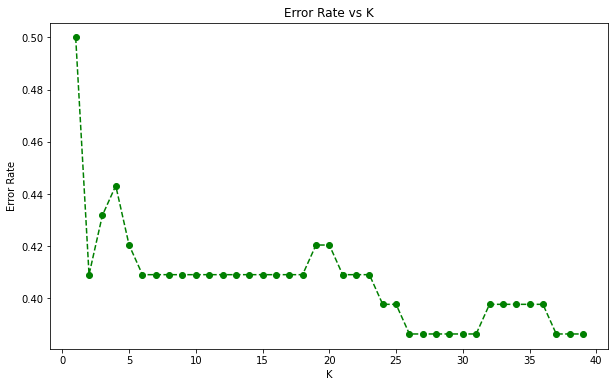

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="green",linestyle="dashed",marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")